In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import scipy.stats as stats
from pymc import HalfCauchy, Model, Normal, sample, HalfNormal
import random
import math
import matplotlib.pyplot as plt


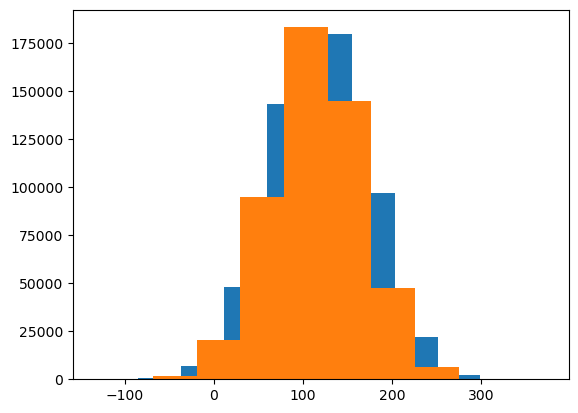

In [54]:
TRUE_MEAN_1 = 120
TRUE_MEAN_2 = 115
TRUE_VARIANCE = 50
SAMPLES = 500000
data1 = np.array([random.gauss(TRUE_MEAN_1, TRUE_VARIANCE) for i in range(0, SAMPLES)])
data2 = np.array([random.gauss(TRUE_MEAN_2, TRUE_VARIANCE) for i in range(0, SAMPLES)])

plt.hist(data1)
plt.hist(data2)
plt.show()

In [49]:
class WeblabModel:    
      def evaluate_model(self, priorAverage: float, priorSigma: float, sampleSize: int, dataAverage: float, dataSigma : float):
          w = (sampleSize / (dataSigma ** 2)) / ((sampleSize / (dataSigma ** 2)) + (1 / (priorSigma ** 2)))                
          averagePosterior = w * dataAverage + (1 - w) * priorAverage
          sigmaPosterior = math.sqrt( 1 / (sampleSize / (dataSigma ** 2) + 1 / (priorSigma ** 2)))
          return averagePosterior,sigmaPosterior
          
          

In [51]:
WeblabModel().evaluate_model(0.002, 0.0025, 10000, 0.04, 0.1)


(0.03475862068965517, 0.0009284766908852594)

In [56]:
WeblabModel().evaluate_model(0.002, 0.0025, SAMPLES, data1.mean(), data1.std())

(0.15181926513429142, 0.002498439670781443)

In [57]:
WeblabModel().evaluate_model(0.002, 0.0025, SAMPLES, data2.mean(), data2.std())

(0.1450155999675164, 0.0024984438065452303)

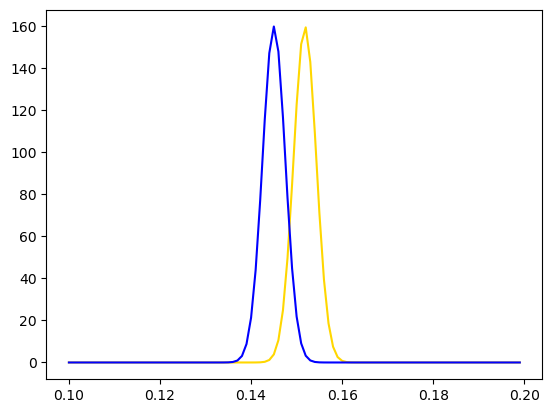

In [81]:
m1,s1 = WeblabModel().evaluate_model(0.002, 0.0025, SAMPLES, data1.mean(), data1.std())
m2,s2 = WeblabModel().evaluate_model(0.002, 0.0025, SAMPLES, data2.mean(), data2.std())
x_axis = np.arange(0.1, 0.2, 0.001) 
plt.plot(x_axis, stats.norm.pdf(x_axis, m1, s1), color='gold')
plt.plot(x_axis, stats.norm.pdf(x_axis, m2, s2), color='blue')
plt.show()

0.006803665166775025 0.0035333301916179167


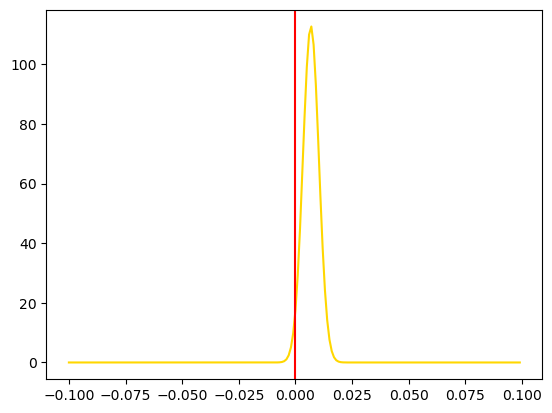

In [93]:
x_axis = np.arange(-0.1, 0.1, 0.001) 
m = m1 - m2;
std = math.sqrt(s1**2 + s2**2);
print(str(m) + " " + str(std));
plt.plot(x_axis, stats.norm.pdf(x_axis, m, std ), color='gold');
plt.axvline(x = 0, color = 'red')
plt.show()